Generally once we get some data, first thing come into our mind is that which algorithm is best for me to build model using this data. 

**Spot-Checking** is a mechanism which can give an initial idea about the best suited algorithm for you based on the data in hand. In spot checking we try all possible algorithms and check their result. It help us to choose 2 or 3 best algorithms and then can apply optimization techniques on those algorithms like regularization, feature engineerin

You cannot know which algorithms are best suited to your problem before hand. You must trial a number of methods and focus attention on those that prove themselves the most promising.

In this post you will discover 6 machine learning classification algorithms that you can use when spot checking your classification problem in Python with scikit-learn.


In the example below 6 different classification algorithms are compared:

    -Logistic Regression
    -Linear Discriminant Analysis
    -K-Nearest Neighbors
    -Classification and Regression Trees
    -Naive Bayes
    -Support Vector Machines

We will not do any feature engineering or optimization. This code is just to check that how with minimal code we can compare different algorithms.
This code will help you that in a baseline version which algorithm will give best results.

We will use sklearn pima indian diabetes dataset for the same.


### Imports

In [1]:
import pandas
import matplotlib.pyplot as plt


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Load dataset

In [3]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

### select dependent and independent variables

In [4]:
X = array[:,0:8]
Y = array[:,8]

### Models
We will evaluate all the models one by one on the dataset. So create a list of models and append all models in it

In [10]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

### Run models

We have 6 models so we will run it one by one on the data and check accuracy of each model

In [11]:
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
DT: 0.695249 (0.067843)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


### Plot results


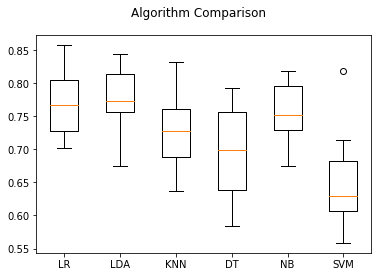

In [12]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From this results its clear that LDA and LR can be consider for this classification problem. Now we can build over it can choose any